# Data in one dimension -> Unidimensional data is analysed using statistics such as Mean, Median, standard deviation
# Data in 2 dimension--> establish relationship, fit relationship between X and Y
# Linear Regression in 2 D, Y=A +Bx, what s the best fit
# $R^2$ -> Measure of reliability of the line

# Cause Effect Relationship
# X Causes Y

# Multiple Regression ==> Multiple dimesnion
# <span style='color:red'>RISK in multiple regression-> Multicollinearity -> X Valirables contining the same information</span>
# Multicollinearity kills Regression's Usefulness
# Multicollinearity: Prevention & Cure --> Factor Analysis, PCA
# $R^2_{adjusted}$ factors penalty for adding irrevelant variables (Read earlier chapter on this same series)
# Irrevalent Variables ==> Any group whose F Ratio <1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house_data=pd.read_csv('datasets/kc_house_data.csv')

In [3]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Lets drop some irrelevant columns that appears to not making any much influence
house_data.drop(['id','lat','long','zipcode'],inplace=True,axis=1)
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  sqft_living15  21613 non-null  int64  
 16  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(13), object(1)
memory usage: 

In [6]:
# determine age of house and drop date and year columns
house_data['date']=pd.to_datetime(house_data['date'])
house_data['house_age']=house_data['date'].dt.year-house_data['yr_built']
house_data.drop(['date'],inplace=True,axis=1)
house_data.drop(['yr_built'],inplace=True,axis=1)
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,house_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,1340,5650,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,1690,7639,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,2720,8062,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,1360,5000,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,1800,7503,28


In [7]:
house_data['renovated']=house_data['yr_renovated'].apply(lambda x:0 if x==0 else 1)
house_data.drop(['yr_renovated'],inplace=True,axis=1)

In [8]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,63,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28,0


In [9]:
house_data.to_csv('datasets/house_data_processed.csv',index=False)

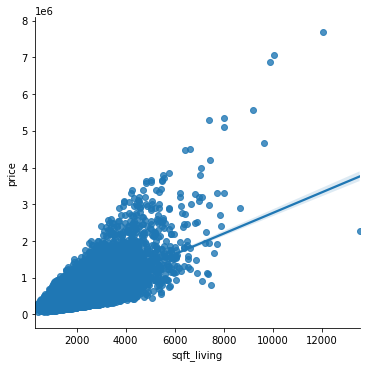

In [10]:
sns.lmplot(x='sqft_living',y='price',data=house_data)

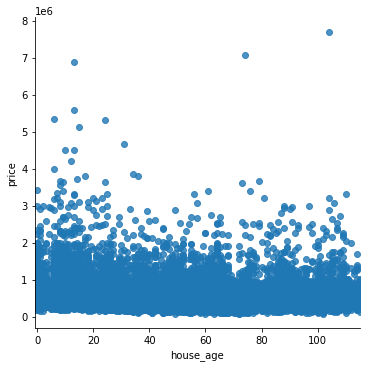

In [11]:
sns.lmplot(x='house_age',y='price',data=house_data)

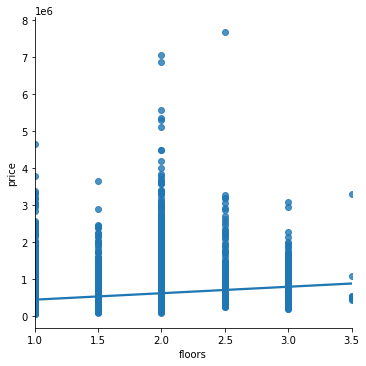

In [12]:
sns.lmplot(x='floors',y='price',data=house_data)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [14]:
X=house_data[['sqft_living']]
y=house_data['price']

In [15]:
X.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [16]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [18]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [19]:
linear_regression=LinearRegression()
model=linear_regression.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [20]:
df=pd.DataFrame({'test':y_test,'predicted':y_pred})
df.sample(5)

,test,predicted
15955,850000.0,570837.598284
15303,809000.0,676018.951290
19462,439000.0,515478.991439
6436,625000.0,720305.836766
11438,590000.0,515478.991439


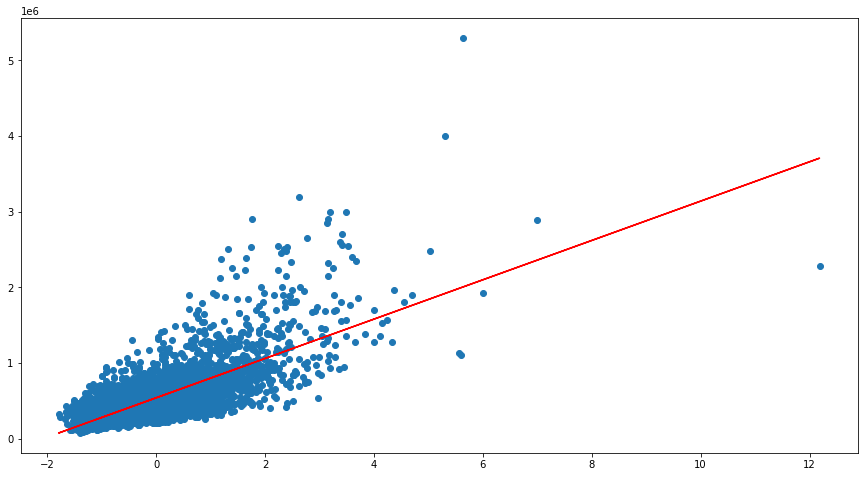

In [21]:
plt.figure(figsize=(15,8))
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,c='r')
plt.show()

# What is $R^2$ value

In [22]:
print('Training Score :',linear_regression.score(X_train,y_train))

Training Score : 0.4926979679475255


In [23]:
from sklearn.metrics import r2_score

In [24]:
score = r2_score(y_test,y_pred)
print('Testing score',score)

Testing score 0.49441512347019934


In [25]:
theta_0=linear_regression.coef_
theta_0[0]

259997.71411534818

In [26]:
intercept=linear_regression.intercept_
intercept

539034.3795835744

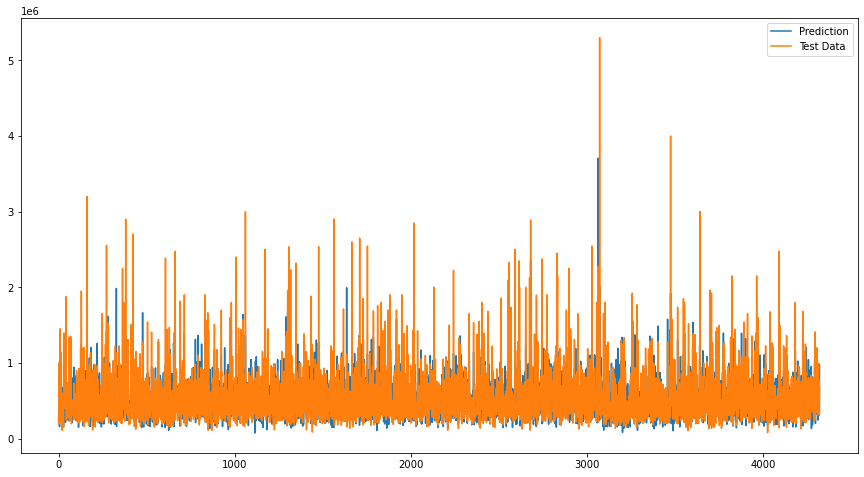

In [32]:
plt.figure(figsize=(15,8))
plt.plot(y_pred,label='Prediction')
plt.plot(y_test.values,label='Test Data')
plt.legend()
plt.show()

# Let's try to fit linear regression using analytically , using y=mx+c

In [28]:
import statsmodels.api as sm

In [29]:
X_train[:5]

array([[-0.84997988],
       [-0.36809398],
       [-0.42285374],
       [-1.22234627],
       [ 0.01522435]])

In [30]:
X_train=sm.add_constant(X_train)
X_train[:5]

array([[ 1.        , -0.84997988],
       [ 1.        , -0.36809398],
       [ 1.        , -0.42285374],
       [ 1.        , -1.22234627],
       [ 1.        ,  0.01522435]])

In [31]:
model=sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.679e+04
Date:                Wed, 15 Sep 2021   Prob (F-statistic):               0.00
Time:                        16:29:33   Log-Likelihood:            -2.4037e+05
No. Observations:               17290   AIC:                         4.807e+05
Df Residuals:                   17288   BIC:                         4.807e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5.39e+05   2006.504    268.644      0.0

# Hypothesis Tests for Regression Coefficients
# Refer this ==> https://bookdown.org/ripberjt/qrmbook/bi-variate-hypothesis-testing-and-model-fit.html


# $H_O \left(\beta=0\right)$:There is no relationship between respondents ideology and their views about the risk of Global Warming.
# $H_1 \left(\beta<0\right)$: On avg, as respondents become more politically conswrvative, they will be less likely to express increased risk associated with Global Warming.
## 
- __Y=A+BX+C__(We are estimating this linear model, while doing so we seek to find values of $\hat\alpha, \hat\beta$ such that $\sum\varepsilon^2$ is minimum)
- __Determine OLS__: We can evaluate OLS from a given set of data. Results gets us a line having SLOPE and INTERCEPT
- Above values have come from a sample, In order to prove those values are statistically correct, we can take various samples and determine different set of (B=Slope and A= Intercept), this gives a set of As and Bs.__Since we can not simply draw many samples, we need to estimate sample distribution, based on our sample size and variance__
# __Residual standard Error__: OR Standard Error of Regression (RSS)= Measure the spread of our observations around REGRESSION LINE <span style='color:red'>$S_E = \sqrt\frac{\sum E_i^2}{n-2}$</span>
# <span style='color:brown'> Standard Error of A and B = Estimation of Variance for A and B=> We use these values to determine how much A and/or B is greater than 0</span>
# $SE(B) = \frac{S_E}{\sqrt TSS_x}$; Where $TSS_x$ is Total Sum of Square of X i.e. $\sum\left(X_i-\bar X\right)^2$  
# $SE(A) = S_E* \sqrt( \frac{1}{n}+\frac{\bar X^2}{TSS_x}) $
- t-statistics for $B = \frac{B}{SE(B)}$ => B is so many standard errors away from 0
- t-statistics for $A = \frac{A}{SE(A)}$

# <span style='color:purple'> Goodness of Fit</span> 
# Covariance $S_{XY} = \frac{\sum(X_i-\bar X)(Y_i-\bar Y)}{n-1}$
# Correlation $r= \frac{S_{XY}}{S_XS_Y}=\frac{\sum(X_i-\bar X)(Y_i-\bar Y)}{\sqrt(\sum(X_i-\bar X)^2\sum(Y_i-\bar Y)^2}$
# Coefficient of Determination: $R^2 = \frac{Explained}{Variance in Output} = \frac{(Y_i-\bar Y)^2 -(\hat Y_i-Y_i)^2}{(Y_i-\bar Y)^2}$